Dataset Shape: (118087, 30)

ADR Statistics:
count    118087.000000
mean        103.650920
std          46.410053
min           0.260000
25%          71.345000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

Null values in ADR: 0


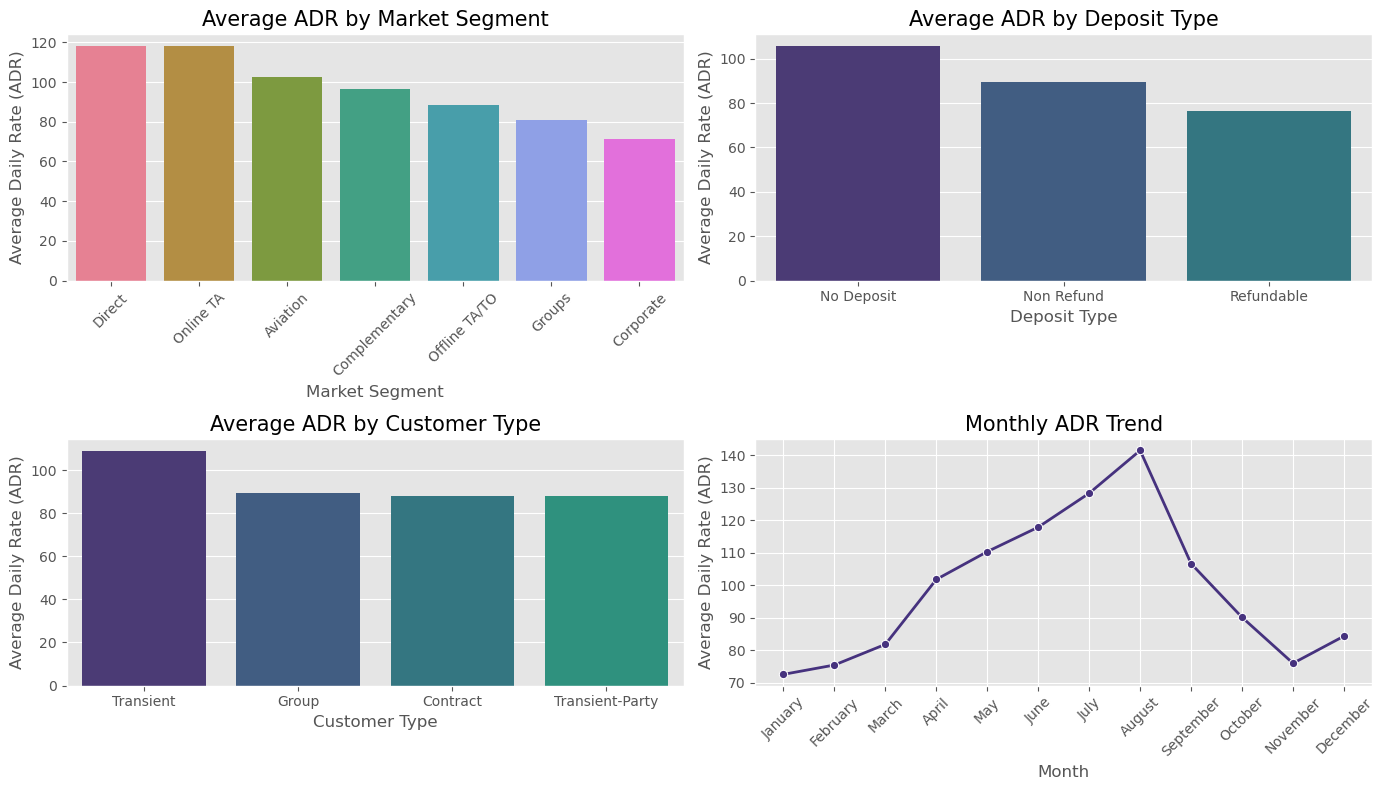

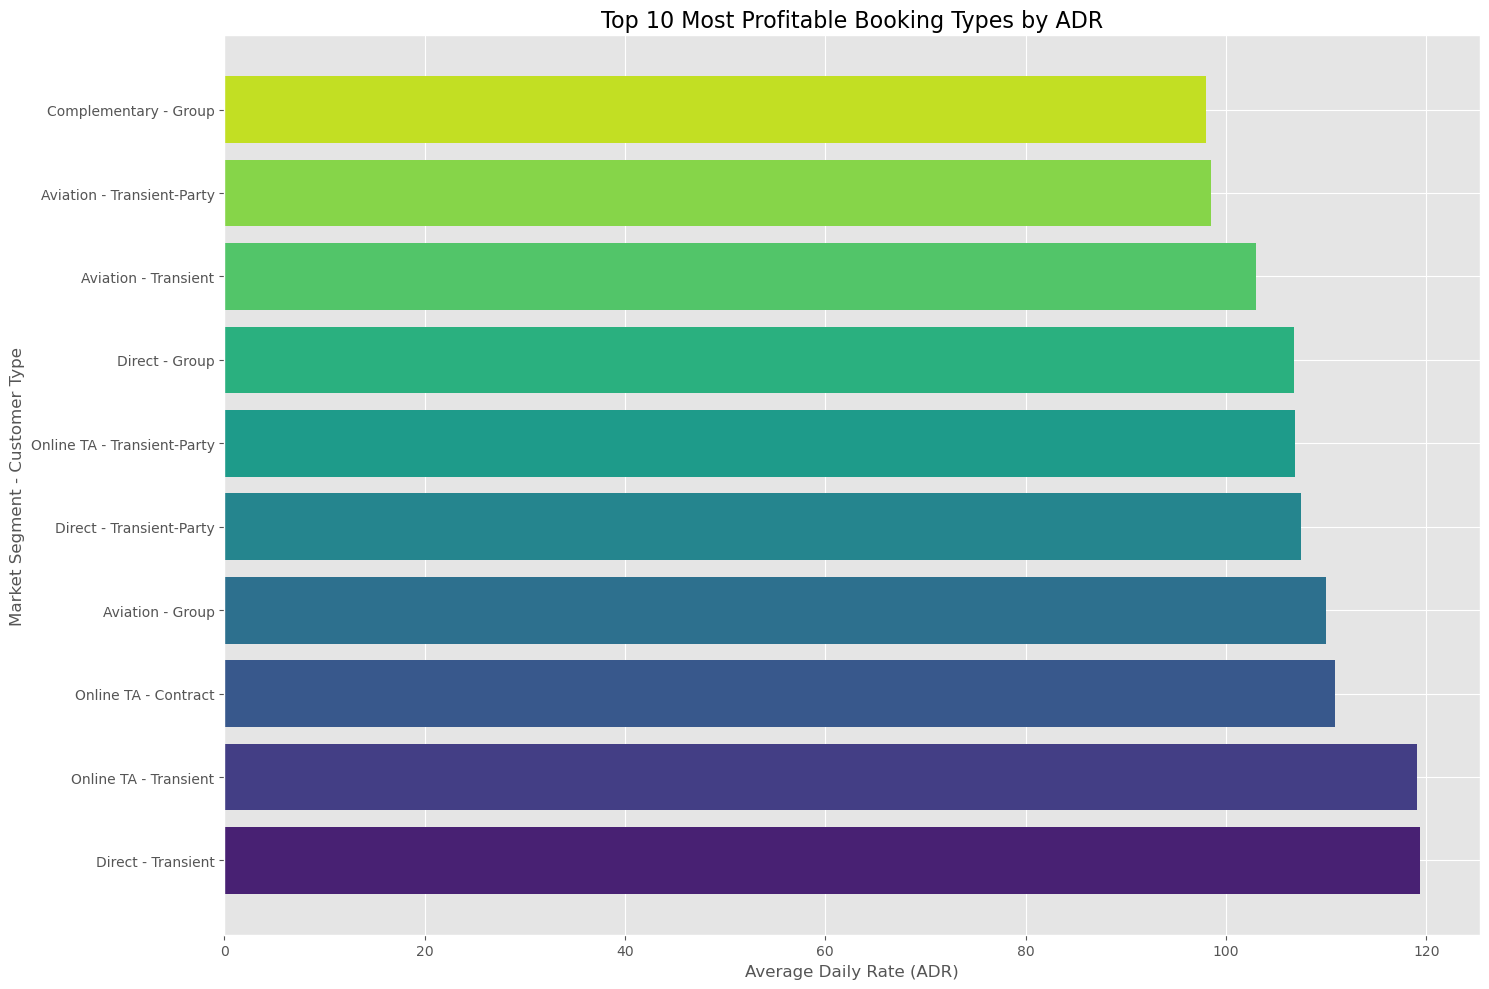

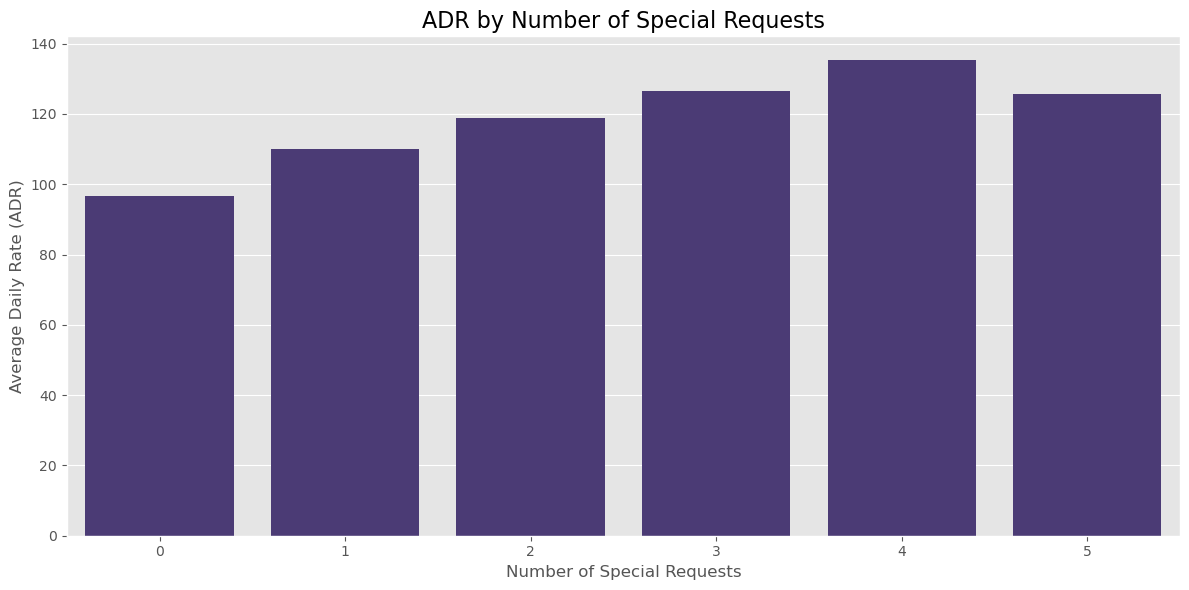

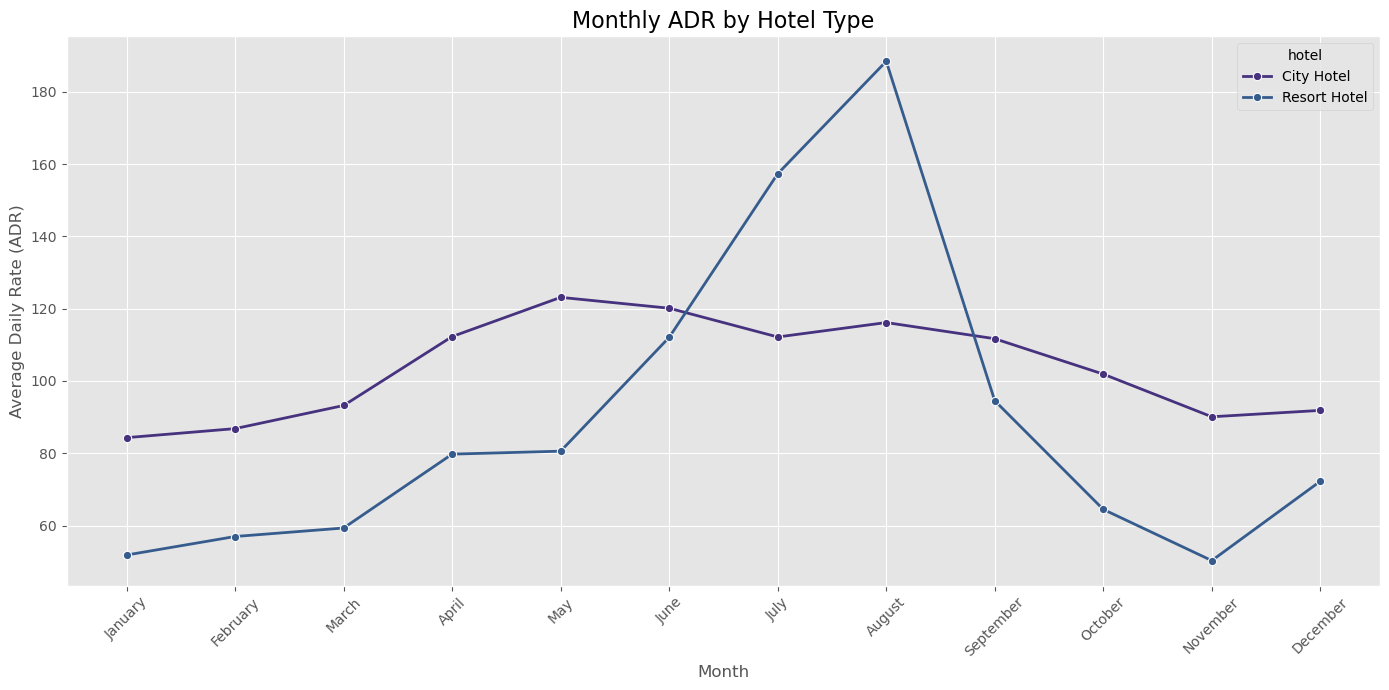

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("viridis")

# Load the data
df = pd.read_csv('hotel_bookings_clean.csv', parse_dates=['arrival_date'])

# Basic exploration
print(f"Dataset Shape: {df.shape}")
print(f"\nADR Statistics:")
print(df['adr'].describe())
print(f"\nNull values in ADR: {df['adr'].isnull().sum()}")

# Calculate total stay length
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# ----- ANALYSIS BY INDIVIDUAL FACTORS -----

# 1. ADR by hotel type
adr_hotel = df.groupby('hotel', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 2. ADR by market segment
adr_market = df.groupby('market_segment', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 3. ADR by customer type
adr_customer = df.groupby('customer_type', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 4. ADR by deposit type
adr_deposit = df.groupby('deposit_type', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 5. ADR by distribution channel
adr_channel = df.groupby('distribution_channel', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 6. ADR by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
adr_month = df.groupby('arrival_date_month', observed=True)['adr'].agg(['mean', 'median', 'count', 'std'])

# 7. ADR by special requests
adr_requests = df.groupby('total_of_special_requests', observed=True)['adr'].agg(['mean', 'median', 'count', 'std']).sort_values('mean', ascending=False)

# 8. ADR by length of stay
adr_stay = df.groupby('total_stay', observed=True)['adr'].agg(['mean', 'median', 'count', 'std'])
# Filter out stays with few bookings for clearer visualization
adr_stay_filtered = adr_stay[adr_stay['count'] > 100].sort_values('mean', ascending=False)

# ----- ANALYSIS BY COMBINATIONS OF FACTORS -----

# 9. ADR by hotel and market segment
adr_hotel_market = df.groupby(['hotel', 'market_segment'])['adr'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# 10. ADR by market segment and customer type
adr_market_customer = df.groupby(['market_segment', 'customer_type'])['adr'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# 11. ADR by market segment and deposit type
adr_market_deposit = df.groupby(['market_segment', 'deposit_type'])['adr'].agg(['mean', 'count']).sort_values('mean', ascending=False)
# ----- VISUALIZATIONS -----

# Set up the figure size for all plots
plt.figure(figsize=(14, 8))

# 1. Market Segment Chart
plt.subplot(2, 2, 1)
sns.barplot(x=adr_market.index, y=adr_market['mean'], hue=adr_market.index, legend=False)
plt.title('Average ADR by Market Segment', fontsize=15)
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)

# 2. Deposit Type Chart
plt.subplot(2, 2, 2)
sns.barplot(x=adr_deposit.index, y=adr_deposit['mean'], hue=adr_deposit.index, legend=False)
plt.title('Average ADR by Deposit Type', fontsize=15)
plt.xlabel('Deposit Type')
plt.ylabel('Average Daily Rate (ADR)')

# 3. Customer Type Chart
plt.subplot(2, 2, 3)
sns.barplot(x=adr_customer.index, y=adr_customer['mean'], hue=adr_customer.index, legend=False)
plt.title('Average ADR by Customer Type', fontsize=15)
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')

# 4. Monthly Trend Chart
plt.subplot(2, 2, 4)
sns.lineplot(x=adr_month.index, y=adr_month['mean'], marker='o', linewidth=2)
plt.title('Monthly ADR Trend', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Combinations analysis visualization
plt.figure(figsize=(15, 10))

# Top 10 most profitable combinations
top_combos = adr_market_customer.head(10).reset_index()
plt.barh(y=[f"{m} - {c}" for m, c in zip(top_combos['market_segment'], top_combos['customer_type'])], 
         width=top_combos['mean'],
         color=sns.color_palette('viridis', 10))
plt.title('Top 10 Most Profitable Booking Types by ADR', fontsize=16)
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Market Segment - Customer Type')
plt.tight_layout()
plt.show()

# Special requests correlation with ADR
plt.figure(figsize=(12, 6))
sns.barplot(x=adr_requests.index, y=adr_requests['mean'])
plt.title('ADR by Number of Special Requests', fontsize=16)
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()

# Monthly ADR by hotel type
monthly_hotel = df.groupby(['hotel', 'arrival_date_month'], observed=True)['adr'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_hotel, x='arrival_date_month', y='adr', hue='hotel', marker='o', linewidth=2)
plt.title('Monthly ADR by Hotel Type', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## What if we include the cancellations in the mix?


8. ADR by Cancellation Status:
   is_canceled        mean  median  count        std
0        False  102.612350    95.0  73973  46.864696
1         True  105.392455    97.0  44114  45.584969

Cancellation Rate by Market Segment (%):
  market_segment  cancellation_rate
4         Groups          61.217981
6      Online TA          36.967264
5  Offline TA/TO          34.467092
0       Aviation          22.077922
2      Corporate          19.319082
3         Direct          15.588642
1  Complementary          12.201964

Cancellation Rate by Deposit Type (%):
  deposit_type  cancellation_rate
1   Non Refund          99.361790
0   No Deposit          28.638743
2   Refundable          22.222222

Market Segments by Expected ADR (accounting for cancellations):
  market_segment  cancellation_rate     avg_adr  expected_adr
3         Direct          15.588642  118.110782     99.698915
1  Complementary          12.201964   96.624222     84.834169
0       Aviation          22.077922  102.743203     

/tmp/ipykernel_12209/1427532929.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel = df.groupby('lead_time_bucket').agg({


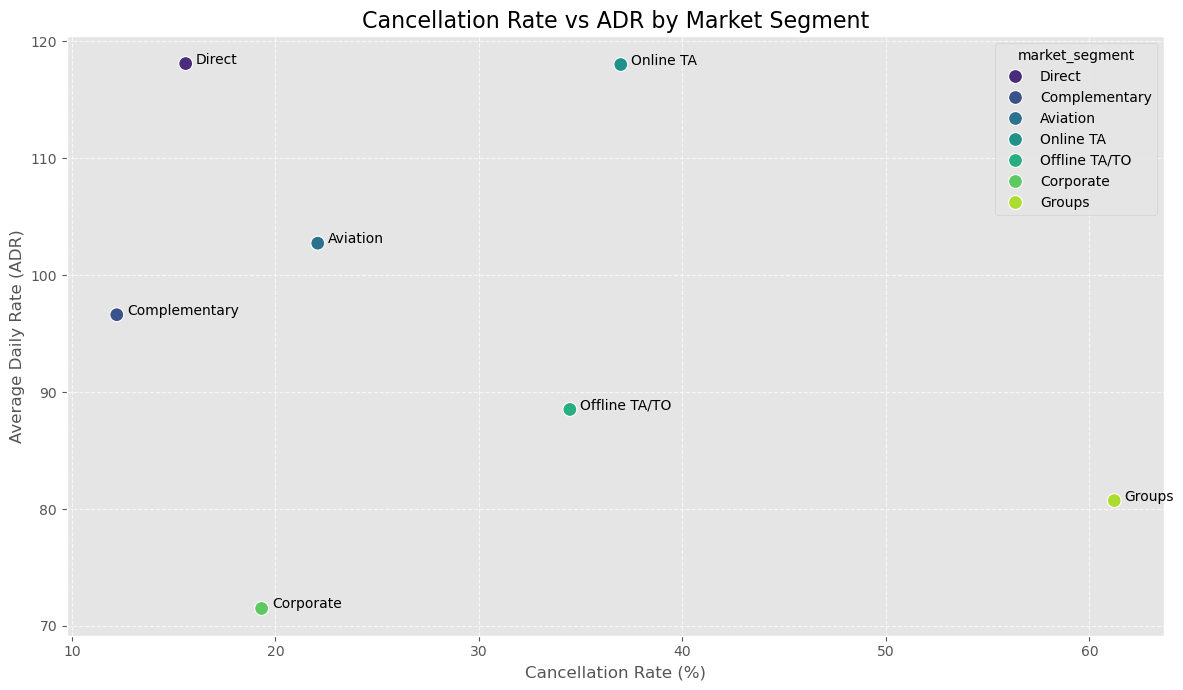

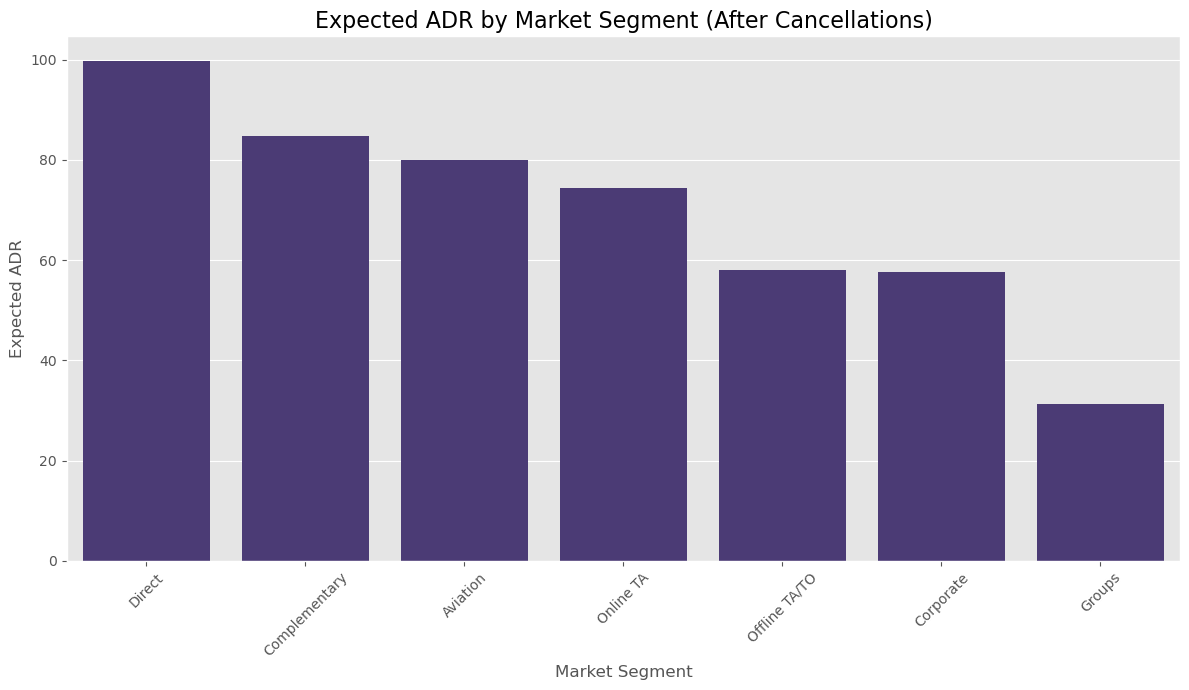

In [12]:
# ----- CANCELLATION ANALYSIS -----

# 1. ADR by cancellation status
adr_canceled = df.groupby('is_canceled')['adr'].agg(['mean', 'median', 'count', 'std']).reset_index()
print("\n8. ADR by Cancellation Status:")
print(adr_canceled)

# 2. Cancellation rate by market segment
cancel_by_segment = df.groupby('market_segment')['is_canceled'].mean().reset_index()
cancel_by_segment.columns = ['market_segment', 'cancellation_rate']
cancel_by_segment['cancellation_rate'] = cancel_by_segment['cancellation_rate'] * 100  # Convert to percentage
cancel_by_segment = cancel_by_segment.sort_values('cancellation_rate', ascending=False)
print("\nCancellation Rate by Market Segment (%):")
print(cancel_by_segment)

# 3. Cancellation rate by deposit type
cancel_by_deposit = df.groupby('deposit_type')['is_canceled'].mean().reset_index()
cancel_by_deposit.columns = ['deposit_type', 'cancellation_rate']
cancel_by_deposit['cancellation_rate'] = cancel_by_deposit['cancellation_rate'] * 100  # Convert to percentage
cancel_by_deposit = cancel_by_deposit.sort_values('cancellation_rate', ascending=False)
print("\nCancellation Rate by Deposit Type (%):")
print(cancel_by_deposit)

# 4. ADR and cancellation rate combined analysis
segment_cancel_adr = df.groupby('market_segment').agg({
    'is_canceled': 'mean',
    'adr': 'mean'
}).reset_index()
segment_cancel_adr.columns = ['market_segment', 'cancellation_rate', 'avg_adr']
segment_cancel_adr['cancellation_rate'] = segment_cancel_adr['cancellation_rate'] * 100
segment_cancel_adr['expected_adr'] = segment_cancel_adr['avg_adr'] * (1 - segment_cancel_adr['cancellation_rate']/100)
segment_cancel_adr = segment_cancel_adr.sort_values('expected_adr', ascending=False)
print("\nMarket Segments by Expected ADR (accounting for cancellations):")
print(segment_cancel_adr)

# 5. Lead time vs cancellation analysis
df['lead_time_bucket'] = pd.cut(df['lead_time'], bins=[0, 30, 90, 180, 365, df['lead_time'].max()], 
                              labels=['0-30 days', '31-90 days', '91-180 days', '181-365 days', '>365 days'])
lead_cancel = df.groupby('lead_time_bucket').agg({
    'is_canceled': 'mean',
    'adr': 'mean'
}).reset_index()
lead_cancel.columns = ['lead_time_bucket', 'cancellation_rate', 'avg_adr']
lead_cancel['cancellation_rate'] = lead_cancel['cancellation_rate'] * 100
lead_cancel['expected_adr'] = lead_cancel['avg_adr'] * (1 - lead_cancel['cancellation_rate']/100)
print("\nLead Time vs Cancellation Rate and ADR:")
print(lead_cancel)

# ----- VISUALIZATIONS FOR CANCELLATION ANALYSIS -----

""" # 1. ADR by cancellation status
plt.figure(figsize=(10, 6))
sns.barplot(x=adr_canceled['is_canceled'].map({True: 'Canceled', False: 'Not Canceled'}), 
            y=adr_canceled['mean'])
plt.title('ADR by Cancellation Status', fontsize=16)
plt.xlabel('Booking Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show() """

# 2. Cancellation rate vs ADR by market segment
plt.figure(figsize=(12, 7))
sns.scatterplot(data=segment_cancel_adr, x='cancellation_rate', y='avg_adr', s=100, 
               hue='market_segment', palette='viridis')
for i, row in segment_cancel_adr.iterrows():
    plt.annotate(row['market_segment'], (row['cancellation_rate']+0.5, row['avg_adr']), fontsize=10)
plt.title('Cancellation Rate vs ADR by Market Segment', fontsize=16)
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Expected ADR (after accounting for cancellations)
plt.figure(figsize=(12, 7))
sns.barplot(x=segment_cancel_adr['market_segment'], y=segment_cancel_adr['expected_adr'])
plt.title('Expected ADR by Market Segment (After Cancellations)', fontsize=16)
plt.xlabel('Market Segment')
plt.ylabel('Expected ADR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Additional recommendations regarding cancellations:
1. Implement stricter cancellation policies for segments with high cancellation rates
2. Consider overbooking strategies based on historical cancellation patterns
3. Offer incentives for early bookings with non-refundable options
4. Target marketing toward segments with lower cancellation rates
5. Analyze lead time patterns to optimize booking acceptance strategies
6. Focus on market segments with the highest expected ADR after cancellations: Direct and Complementary

## Summary :
    Pricing & Seasonality: Adjust rates seasonally (higher in August, promotions in January) while tightening refundable policies in peak seasons to maximize revenue.

    Channel Strategy: Prioritize GDS (negotiate better rates) and aggressively target Direct bookings (higher revenue) to balance dependency on intermediaries.

    Cancellation Management: Stricter policies for high-cancellation segments combined with overbooking strategies and non-refundable incentives to optimize occupancy.

    ADR Optimization: Raise Thursday pricing and introduce Friday packages/minimum stays to boost weekend revenue while focusing on high-ADR segments (Direct/Complementary).

    Marketing Focus: Align campaigns with low-cancellation, high-ADR segments and leverage lead time analysis to refine booking acceptance timing.